# A reconstruction nosie dependence on CMB white noise level
This code compute normalization and power spectrum of quadratic estiamtors with varying CMB noise level

In [6]:
# external
import numpy as np
from matplotlib.pyplot import *
# from cmblensplus/wrap/
import basic
import curvedsky as cs
# from cmblensplus/utils/
import plottools as pl
import cmb

First define parameters

In [2]:
Tcmb  = 2.726e6    # CMB temperature
Lmin, Lmax  = 2, 2048       # maximum multipole of output normalization
rlmin, rlmax = 100, 4096  # CMB multipole range for reconstruction
L = np.linspace(0,Lmax,Lmax+1)
Lfac = (L*(L+1.))**2/(2*np.pi)
ac2rad = np.pi/10800.
lTmax = 3000
quad = ['TT','TE','EE','TB','EB','MV']
QDO = [True,True,True,True,True,False] # this means that TT, TE, EE, TB and EB are used for MV estimator

Load arrays of CMB unlensed and lensed Cls. Unlensed Cls are not used for now. The Cls should not be multiplied by any factors and should not have units.  

In [3]:
# ucl is an array of shape [0:5,0:rlmax+1] and ucl[0,:] = TT, ucl[1,:] = EE, ucl[2,:] = TE, lcl[3,:] = phiphi, lcl[4,:] = Tphi
ucl = cmb.read_camb_cls('../data/unlensedcls.dat',ftype='scal',output='array')[:,:rlmax+1] # TT, EE, TE, pp, Tp
# lcl is an array of shape [0:4,0:rlmax+1] and lcl[0,:] = TT, lcl[1,:] = EE, lcl[2,:] = BB, and lcl[3,:] = TE
lcl = cmb.read_camb_cls('../data/lensedcls.dat',ftype='lens',output='array')[:,:rlmax+1] # TT, EE, BB, TE

Loop over SNR calculation

In [4]:
sigs = [3,4,5,8,10,20,30,50]
snr = np.zeros((6,len(sigs)))
for i, sig in enumerate(sigs):
    nl  = np.zeros((4,rlmax+1))
    nl[0,:] = (sig*ac2rad/Tcmb)**2
    nl[1,:] = 2*nl[0,:]
    nl[2,:] = 2*nl[0,:]
    nl[0,lTmax+1:] = 1e30
    ocl = lcl + nl
    Ag, Ac, Wg, Wc = cs.norm_quad.qall('lens',QDO,Lmax,rlmin,rlmax,lcl,ocl)
    for qi in range(6):
        var_lm = ( ucl[3,Lmin:Lmax+1] + Ag[qi,Lmin:Lmax+1] ) 
        snr[qi,i] = np.sqrt( np.sum( (L[Lmin:Lmax+1]+.5) * ucl[3,Lmin:Lmax+1]**2/var_lm**2 ) )
    print(snr[:,i])

[186.27056138  91.11680514 143.76678156  61.10459343 276.82560884
 370.10665876]
[184.62408933  86.40441724 120.7332669   43.97891204 219.70792774
 321.52688971]
[182.57981001  82.24926956 105.60088099  32.68002772 177.65807803
 288.52144893]
[174.54398033  72.02188639  79.32899284  15.67916505 100.88686222
 232.85913889]
[168.10239131  66.43678987  68.43110958  10.61724063  72.24078448
 211.66543428]
[133.82600152  46.18051158  36.73829453   2.86519947  19.0681705
 153.16966525]
[106.25155785  33.15516289  20.47564905   1.28098588   7.1543298
 119.31695087]
[71.95738108 18.27645362  6.85891947  0.45352687  1.69866732 79.79329722]


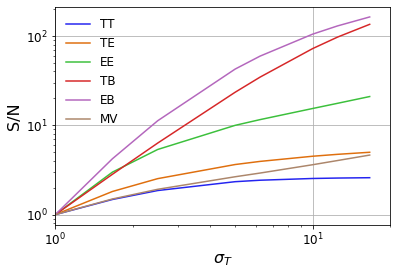

In [7]:
pl.plot_1dstyle(xmin=1,xmax=20,xlab=r'$\sigma_T$',ylab='S/N',xlog=True,ylog=True,grid=True)
x = 50./np.array(sigs)
for qi, q in enumerate(quad):
    plot(x,snr[qi,:]/snr[qi,-1],label=q)
legend()